## Задача 2. Сравнение методов классификации

**ФИО**: Степырев Даниил Федорович

**Номер группы**: 22.М05

**Выполненные пункты** (все пункты и дополнительные задания):

- Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.

- Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- **target**). Демо блокнот с анализом этих данных можно найти [тут](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb).

- Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).

- Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.

- При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).

- Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.

- Повторить предыдущий пункт для библиотечных реализаций (например, из **sklearn**) всех пройденных методов классификации (**logistic regression, svm, knn, naive bayes, decision tree**).

- Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

- (**+2 балла**) Реализовать еще один из методов классификации и добавить его в сравнение.

- (**+2 балла**) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.


### Данные, на которых решается задача

В первой части задания используется датасет заболеваний сердца.

Описание датасета:
* **age** --- возраст (в годах); <br>
* **sex** --- пол (1 --- мужчина; 0 --- женщина); <br>
* **cp** --- тип боли в груди; <br>
* **trestbps** --- артериальное давление в покое (в мм рт.ст. при поступлении в стационар); <br>
* **chol** --- холестерин сыворотки в мг/дл; <br>
* **fbs** --- уровень сахара в крови (1 --- >120 мг/дл; 0 --- иначе); <br>
* **restecg** --- результаты электрокардиографии в покое; <br>
* **thalach** --- максимальная достигнутая частота сердечных сокращений; <br>
* **exang** --- стенокардия, вызванная физической нагрузкой (1 --- да; 0 --- нет); <br>
* **oldpeak** --- депрессия сегмента ST, вызванная физической нагрузкой, по сравнению с состоянием покоя; <br>
* **slope** --- наклон пикового сегмента ST при нагрузке; <br>
* **ca** --- количество крупных сосудов (0-3), окрашенных при флюороскопии; <br>
* **thal** --- 1 --- нормальный; 2 --- фиксированный дефект; 3 --- обратимый дефект; <br>
* **target** --- есть болезнь или нет (1 --- есть; 0 --- нет).

Решаем задачу классификации, предсказываем целевой признак **target** --- имеет ли пациент заболевание сердца.

### Считывание данных

Подключаем использумые библиотеки:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Считываем обучающую выборку:

In [2]:
df = pd.read_csv('Dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Общее количество пропущенных значений:

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Разведочный анализ (EDA)

Рассмотрим, сколько различных значений принимает целевой признак:

In [4]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

Построим график:

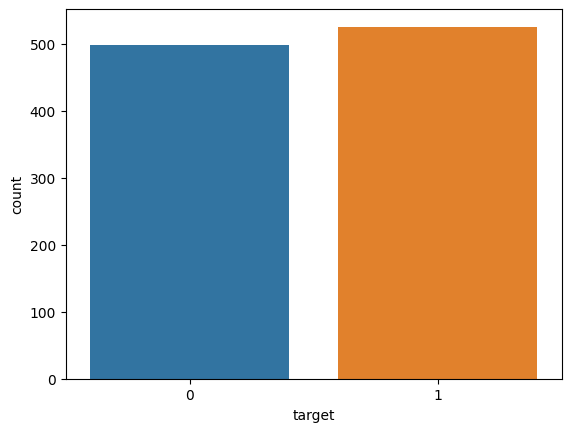

In [5]:
sns.countplot(x="target", data=df)
plt.show()

Видим, что в датасете чуть больше людей с заболеванием сердца.

### Количественный признак age

Выясним, какие значения принимает признак **age** в датасете:

In [6]:
df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

Видим, что наимеьший возраст --- 29 лет, а самый большой --- 77. Среднее значение 54 года.

Введём дополнительную функцию для удобного отображения графиков:

In [7]:
def show_target_crosstab(x_param, x_param_name = "", figsize_number = 20):
    pd.crosstab(df[x_param], df.target).plot(kind="bar", figsize=(figsize_number, 6), color=['green','orange'])
    plt.xlabel(x_param_name)
    plt.ylabel('Частота сердечных заболеваний')
    plt.legend(["Нет заболевания", "Есть заболевание"])
    plt.show()

Построим график наличия сердечных заболеваний относительно возраста:

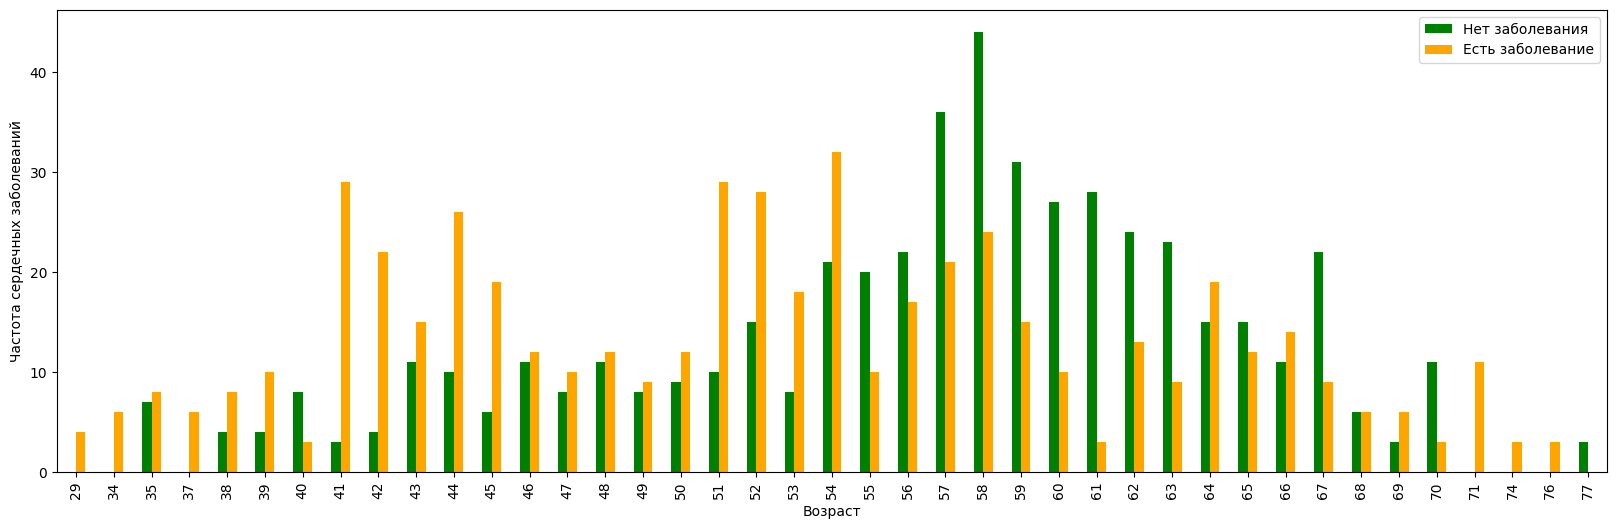

In [8]:
show_target_crosstab('age', 'Возраст')

Из графика видим, что у пациентов в возрасте от 29 до 54 и частота наличия сердечного заболевания выше, чем его отсутствие. У пациентов в возрасте от 55 до 67 (с двумя исключениями: 64 и 66 лет) преобладает отсутствие сердечного заболевания. Наибольшая частота сердечного заболевания у людей в возрасте 41, 51 b 54 года. Наименьшая --- у людей в возасте 57 и 58 лет.

Посмотрим, какой средний возраст у людей, обладающих и не обладающих сердечными заболеваниями:

In [9]:
df.groupby('target').mean()['age']

target
0    56.569138
1    52.408745
Name: age, dtype: float64

Видим, что средний возраст людей, не обладающих сердечными заболеваниями равен 56, а пациентов с сердечными заболеваниями --- 52.

### Дискретный признак sex

Выясним, какие значения принимает признак **sex** в датасете:

In [10]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

Видим, что в датасете мужчин более чем в два раза больше, чем женщин.

Построим график:

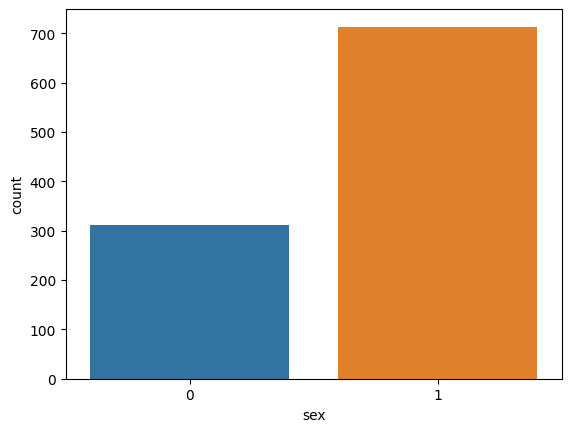

In [11]:
sns.countplot(x="sex", data=df)
plt.show()

Построим график наличия сердечных заболеваний относительно пола:

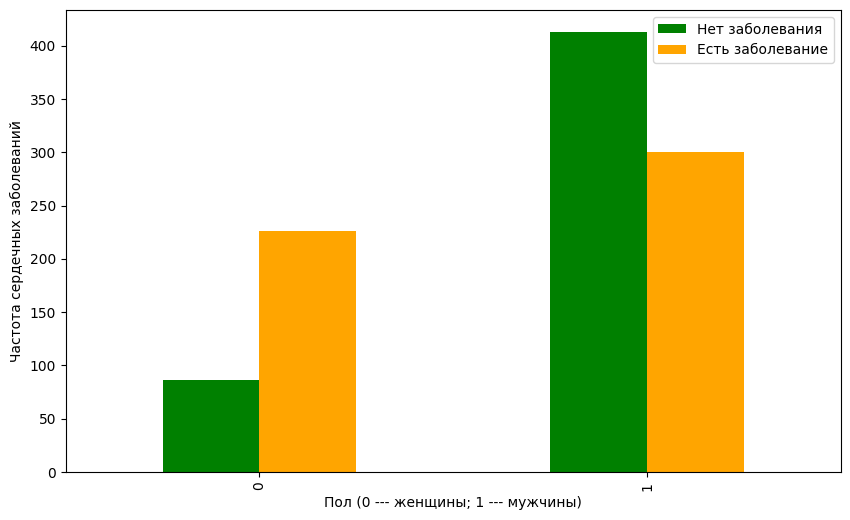

In [12]:
show_target_crosstab('sex', 'Пол (0 --- женщины; 1 --- мужчины)', 10)

Видим, что среди пациентов женщин более чем в два раза больше людей с заболеванием сердца, чем без него. Среди пациентов мужчин больше людей без заболевания сердца, чем с ним.

Посмотрим, сколько в среднем людей разного пола, обладающих и не обладающих сердечными заболеваниями:

In [13]:
df.groupby('sex').mean()['target']

sex
0    0.724359
1    0.420757
Name: target, dtype: float64

Видим, что 72 процента женщин и 42 процента мужчин в датасете обладают сердечными заболеваниями.

### Категориальный признак cp

Выясним, какие значения принимает признак **cp** в датасете:

In [14]:
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

Видим, что в датасете признак **cp** принимает 4 различных значения.

Построим график:

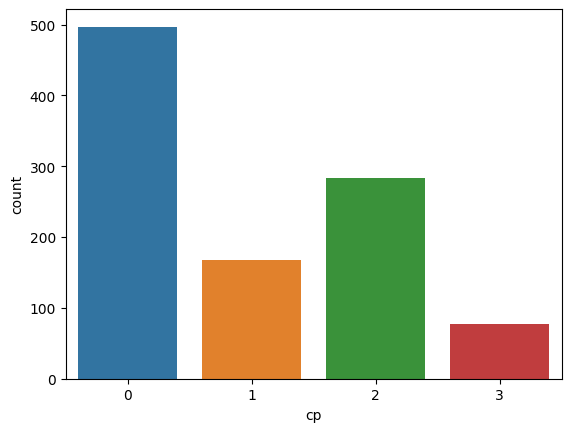

In [15]:
sns.countplot(x="cp", data=df)
plt.show()

Из графика видим, что самый частый тип боли в груди --- тип 0. Наименее частый --- тип 3.

Построим график наличия сердечных заболеваний относительно типа боли в груди:

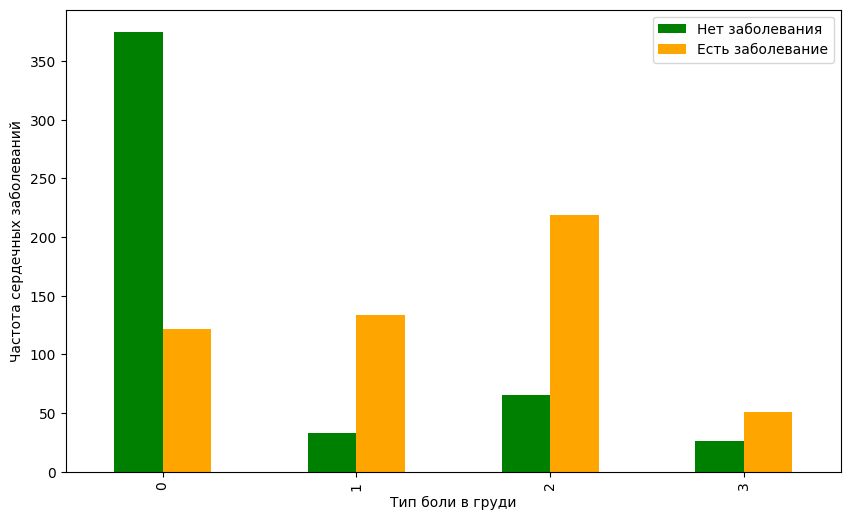

In [16]:
show_target_crosstab('cp', 'Тип боли в груди', 10)

Видим, что у пациентов с типом боли 0 примерно в три раза больше людей без сердечных заболеваний. У остальных типов 1, 2 и 3 количество людей с сердечными заболеваниями больше, чем число пациентов без них. Наиболее высокая частота сердечных заболеваний у пациентов с типом боли 2, наименьшая --- у пациентов с типом боли 3.

Посмотрим, сколько в среднем людей с разным типом болей в груди обладает и не обладает сердечными заболеваниями:

In [17]:
df.groupby('cp').mean()['target']

cp
0    0.245473
1    0.802395
2    0.771127
3    0.662338
Name: target, dtype: float64

Видим, что только 24 процента пациентов с типом боли в груди 0 обладает сердечным заболеванием, у пациентов с типом боли груди 1 этот процент равен 80, у людей с типом боли 2 --- 77 процентов, у людей с типом боли 3 --- 66 процентов.

### Количественный признак trestbps

Выясним, какие значения принимает признак **trestbps** в датасете:

In [18]:
df['trestbps'].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

Видим, что наименьшее значение артериального давления равно 94, наивысшее 200, а среднее 131.

Построим график наличия сердечных заболеваний относительно артериального значения:

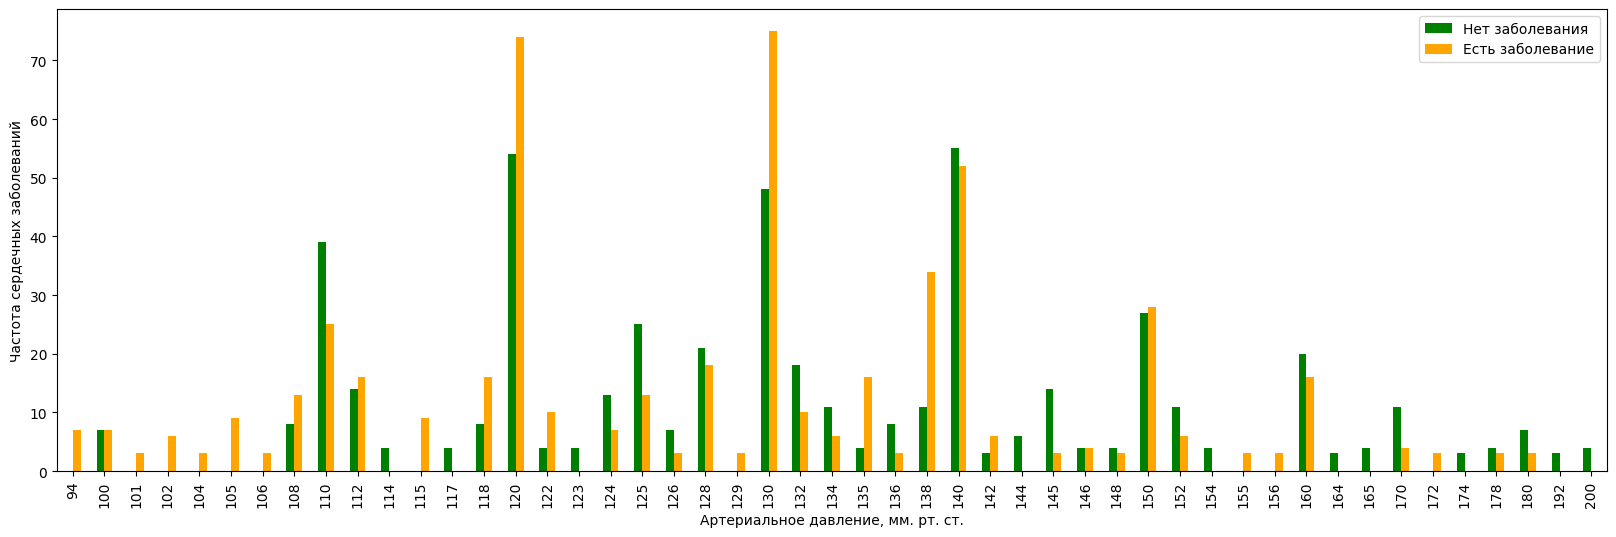

In [19]:
show_target_crosstab('trestbps', 'Артериальное давление, мм. рт. ст.')

Из графика видим, что у пациентов с артериальным давлением ниже 123 мм. рт. ст. (за исключением 110) преобладает число людей с сердечными заболеваниями. Число людей, не обладающих сердечными заболеваниями, наивысшее у пациентов с артериальным давлением выше 156, а ткже от 123 до 128 мм. рт. ст. Наиболее частый случай пациентов с сердечным заболеванием у людей с артериальным давлением 120 и 130 мм. рт. ст.

Посмотрим, какое давление в среднем у людей, обладающих и не обладающих сердечными заболеваниями:

In [20]:
df.groupby('target').mean()['trestbps']

target
0    134.106212
1    129.245247
Name: trestbps, dtype: float64

Видим, что среднее артериальное давление у людей без сердечных заболеваний равно 134 мм. рт. ст., у пациентов с сердечными заболеваниями --- 129 мм. рт. ст.

### Количественный признак chol

Выясним, какие значения принимает признак **chol** в датасете:

In [21]:
df['chol'].describe()

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64

Видим, что наименьшее значения холестерина сыворотки равно 126 мг/дл, наивысшее --- 564 мг/дл, среднее --- 246 мг/дл.

Построим график наличия сердечных заболеваний относительно значений холестерина сывортки:

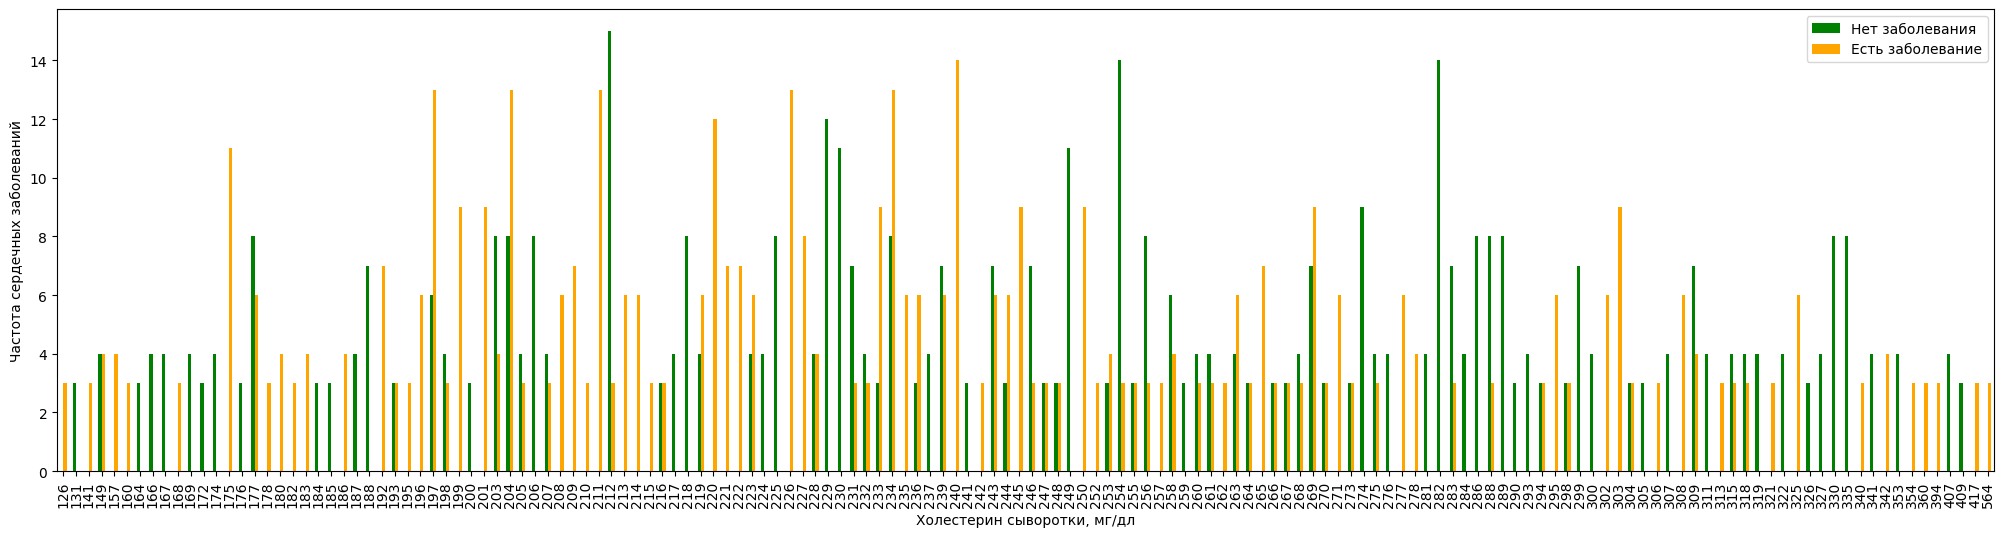

In [22]:
show_target_crosstab('chol', 'Холестерин сыворотки, мг/дл', 25)

Видим, что у людей с холестерином сыворотки ниже 245 мг/дл преобладает число пациентов с сердечными заболеваниями. У пациентов с холестерином сыворотки выше 308 мг/дл преобладает число людей без сердечных заболеваний. Наиболее частое значение холестерина сывортки у людей без сердечных заболеваний равно 212, 254 и 282 мг/дл. Наиболее частое значение холестерина сывортки у людей, обладающих сердечными заболевания равно 204, 234 и 240 мг/дл.

Посмотрим, какое среднее значения холестерина сывортки у людей, обладающих и не обладающих сердечными заболеваниями:

In [23]:
df.groupby('target').mean()['chol']

target
0    251.292585
1    240.979087
Name: chol, dtype: float64

Среднее значение холестерина сывортки у людей без сердечных заболеваний равно 251 мг/дл, у пациентов с сердечными заболеваниями --- 241 мг/дл.

### Дискретный признак fbs

Выясним, какие значения принимает признак **fbs** в датасете:

In [24]:
df.fbs.value_counts()

0    872
1    153
Name: fbs, dtype: int64

Видим, что более чем в 5 раз пациентов с уровнем сахара в крови ниже 120 мг/дл.

Построим график:

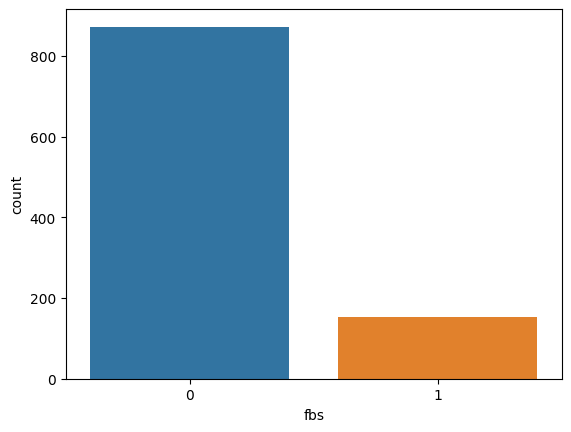

In [25]:
sns.countplot(x="fbs", data=df)
plt.show()

Построим график наличия сердечных заболеваний относительно уровня сахара в крови:

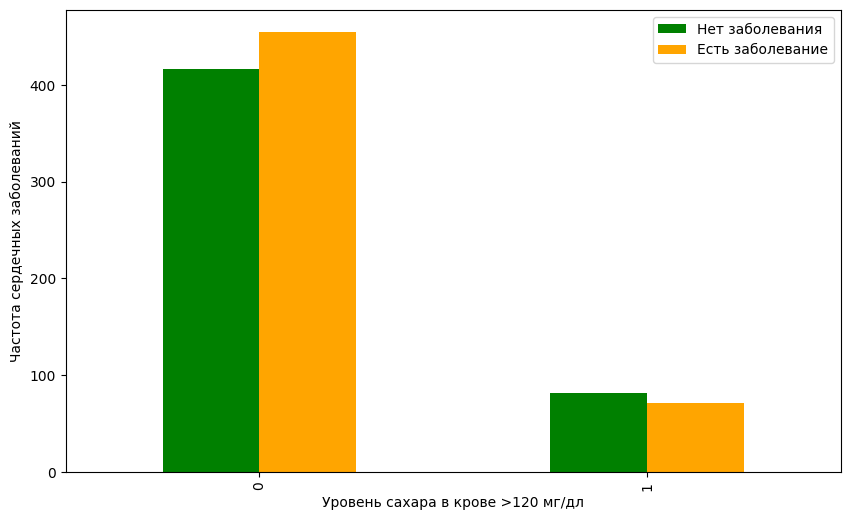

In [26]:
show_target_crosstab('fbs', 'Уровень сахара в крове >120 мг/дл', 10)

Видим, что у людей с уровнем сахара в крови ниже 120 мг/дл преобладает число пациентов с сердечными заболеваниями, а у пациентов с уровнем сахара выше 120 мг/дл --- число людей без сердечных заболеваний. Также видим, что в датасете больше пациентов с уровнем сахара в крови ниже 120 мг/дл.

Посмотрим, сколько в среднем людей с разным уровнем сахара в крови обладает и не обладает сердечными заболеваниями:

In [27]:
df.groupby('fbs').mean()['target']

fbs
0    0.521789
1    0.464052
Name: target, dtype: float64

Видим, что у людей с уровнем сахара в крови ниже 120 мг/дл 52 процента пациентов имеют сердечные заболевания. У людей с уровнем сахара в крови выше 120 мг/дл 46 процентов пациентов обладает сердечными заболеваниями.

### Категориальный признак restecg

Выясним, какие значения принимает признак **restecg** в датасете:

In [28]:
df.restecg.value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

Видим, что наиболее частый результаты электрокардии --- тип 1, наименее частые --- тип 2.

Построим график:

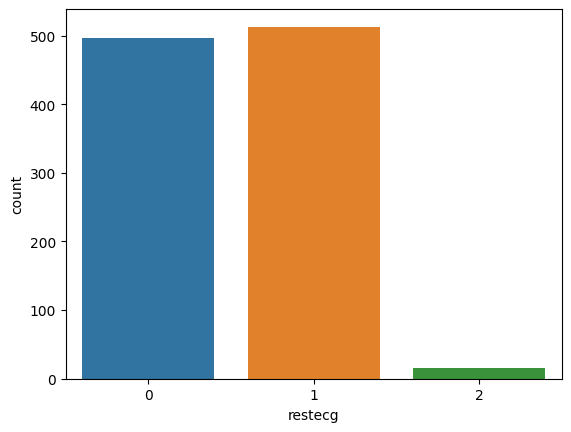

In [29]:
sns.countplot(x="restecg", data=df)
plt.show()

Построим график наличия сердечных заболеваний относительно типа электрокардии:

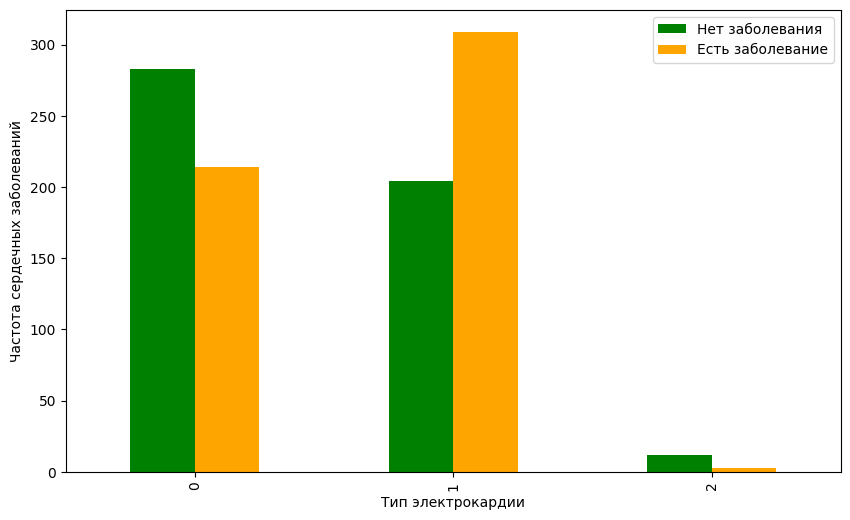

In [30]:
show_target_crosstab('restecg', 'Тип электрокардии', 10)

Видим, что у людей с типом электрокардии 0 и 2 преобладает число людей без сердечных заболеваний. У пациентов с типом электрокардии 1 преобладает число людей с сердечными заболеваниями.

Посмотрим, сколько в среднем людей с разным типом электрокардии обладает и не обладает сердечными заболеваниями:

In [31]:
df.groupby('restecg').mean()['target']

restecg
0    0.430584
1    0.602339
2    0.200000
Name: target, dtype: float64

Видим, что у людей с типом электрокардии 0 43 процента людей обладает сердечными заболеваниями, у пациентом с типом 1 --- 60 процентов, у людей с типом 2 --- 20 процентов.

### Количественный признак thalach

Выясним, какие значения принимает признак **thalach** в датасете:

In [32]:
df['thalach'].describe()

count    1025.000000
mean      149.114146
std        23.005724
min        71.000000
25%       132.000000
50%       152.000000
75%       166.000000
max       202.000000
Name: thalach, dtype: float64

Видим, что наименьшее значения максимальной частоты сердечных сокращений равно 71, наивысшее --- 202, среднее --- 149.

Построим график наличия сердечных заболеваний относительно значений максимальной частоты сердечных сокращений:

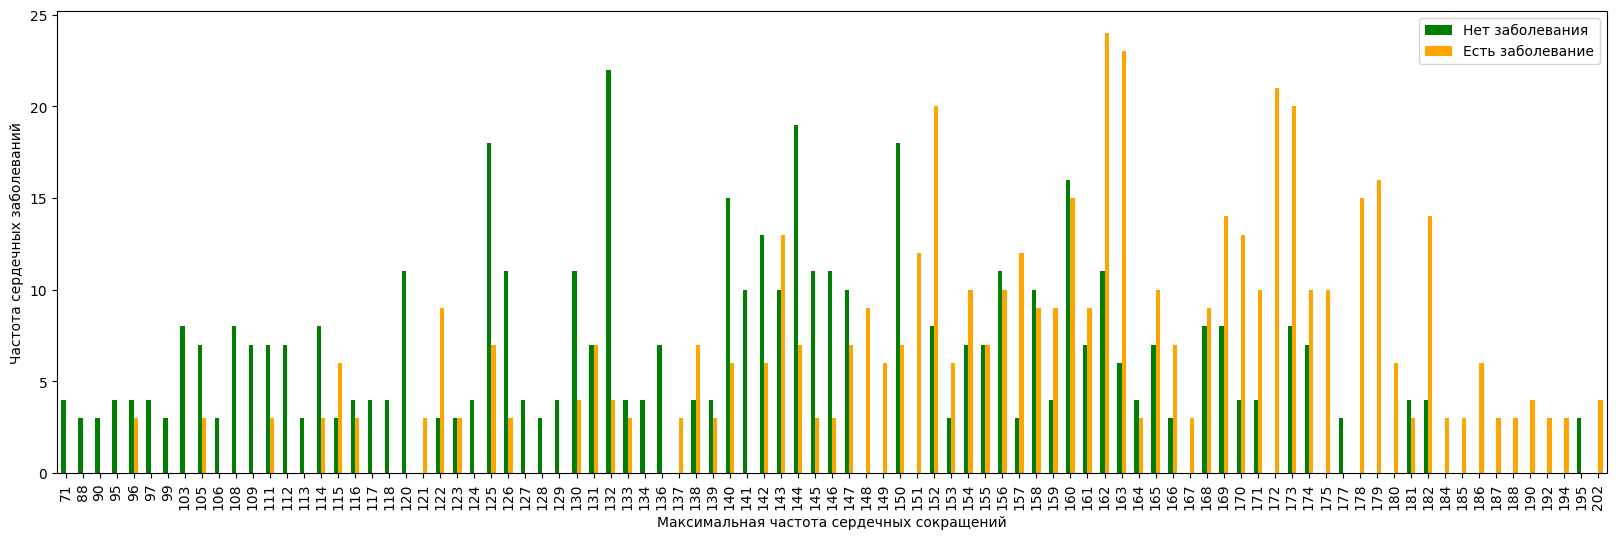

In [33]:
show_target_crosstab('thalach', 'Максимальная частота сердечных сокращений')

Видим, что у людей с максимальной частоты сердечных сокращений ниже 150 преобладает число людей без сердечных заболеваний. У пациентов с максимальной частоты сердечных сокращений выше 150 преобладает число людей с сердечными заболеваниями.

Посмотрим, какое среднее значения максимальной частоты сердечных сокращений у людей, обладающих и не обладающих сердечными заболеваниями:

In [34]:
df.groupby('target').mean()['thalach']

target
0    139.130261
1    158.585551
Name: thalach, dtype: float64

Видим, что среднее значение максимальной частоты сердечных сокращений у людей, не обладающих сердечными заболеваниями равно 139, а у пациентов с сердечными заболеваниями --- 159.

### Дискретный признак exang

Выясним, какие значения принимает признак **exang** в датасете:

In [35]:
df.exang.value_counts()

0    680
1    345
Name: exang, dtype: int64

Видим, что число людей без стенокардии почти в два раза больше, чем обладающих стенокардией.

Построим график:

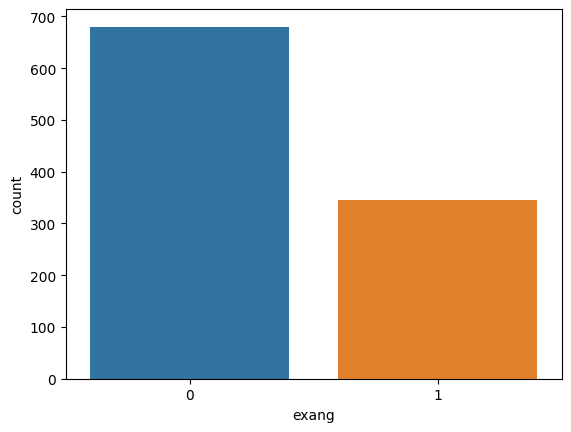

In [36]:
sns.countplot(x="exang", data=df)
plt.show()

Построим график наличия сердечных заболеваний относительно наличия стенокардии:

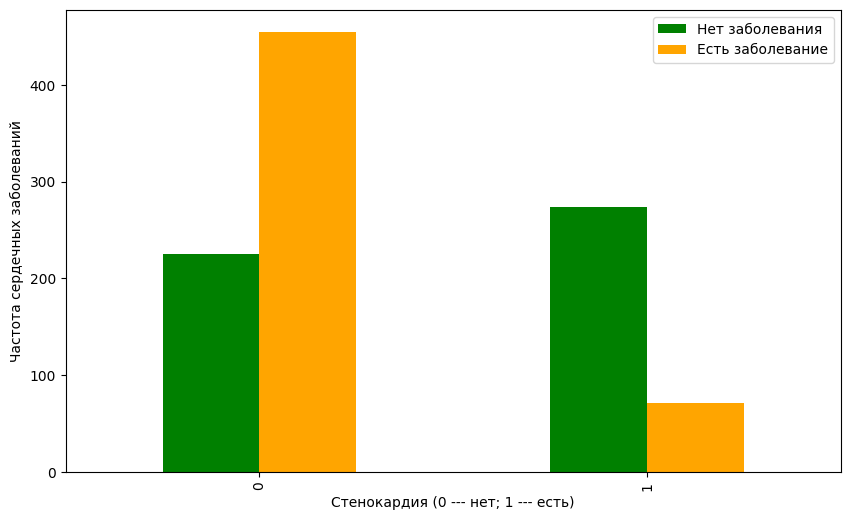

In [37]:
show_target_crosstab('exang', 'Стенокардия (0 --- нет; 1 --- есть)', 10)

Видим, что у людей, не обладающих стенокардией, почти в два раза больше людей с сердечными заболеваниями. У пациентов со стенокардией число людей без сердечных заболеваний более чем в три раза больше, чем обладающих ими.

Посмотрим, сколько в среднем людей со стенокардией и без обладает и не обладает сердечными заболеваниями:

In [38]:
df.groupby('exang').mean()['target']

exang
0    0.669118
1    0.205797
Name: target, dtype: float64

Видим, что у людей без стенокардии 67 процентов обладают сердечными заболеваниями. У пациентов со стенокардией только 21 процент обладает сердечными заболеваниями.

### Признак oldpeak

Выясним, какие значения принимает признак **oldpeak** в датасете:

In [39]:
df.oldpeak.describe()

count    1025.000000
mean        1.071512
std         1.175053
min         0.000000
25%         0.000000
50%         0.800000
75%         1.800000
max         6.200000
Name: oldpeak, dtype: float64

Видим, что наименьшее значения депрессии сегмента ST равно 0.00, наивысшее --- 6.20, среднее --- 1.07.

Построим график наличия сердечных заболеваний относительно значений депрессии сегмента ST:

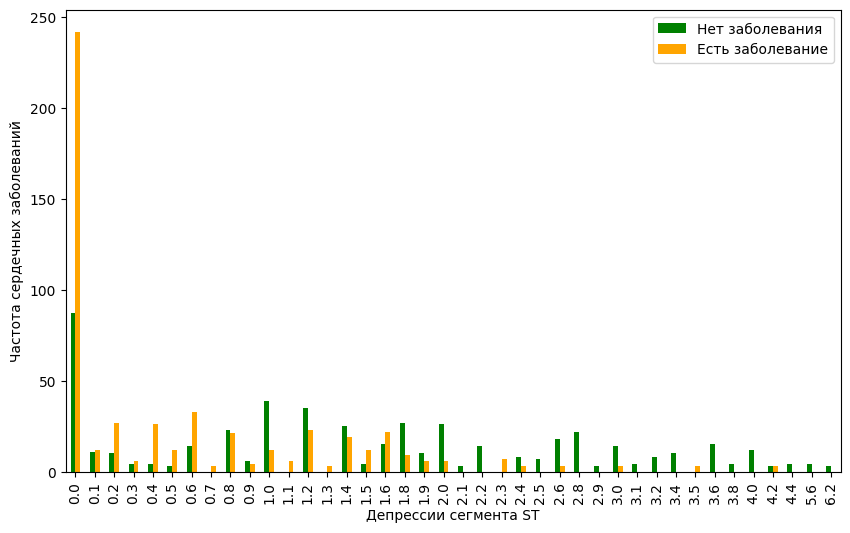

In [40]:
show_target_crosstab('oldpeak', 'Депрессии сегмента ST', 10)

Видим, что наибольшее значение людей с сердечными заболеваниями обладает депрессией сегмента ST равной 0.0. У людей с депрессией сегмента ST ниже 0.8 преобладает число пациентов с сердечными заболеваниями. У людей с депрессией сегмента ST выше 0.7 преобладает число пациентов без сердечных заболеваний.

Посмотрим, какое среднее значение депрессией сегмента ST у людей, обладающих и не обладающих сердечными заболеваниями:

In [41]:
df.groupby('target').mean()['oldpeak']

target
0    1.600200
1    0.569962
Name: oldpeak, dtype: float64

Видим, что среднее значение депрессией сегмента ST у людей, не обладающих сердечными заболеваниями равно 1.6, а у пациентов с сердечными заболеваниями --- 0.5.

### Категориальный признак slope

Выясним, какие значения принимает признак **slope** в датасете:

In [42]:
df.slope.value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

Видим, что в датасете больше всего людей с типом пикового сегмента ST 1, меньше всего --- с типом 0.

Построим график:

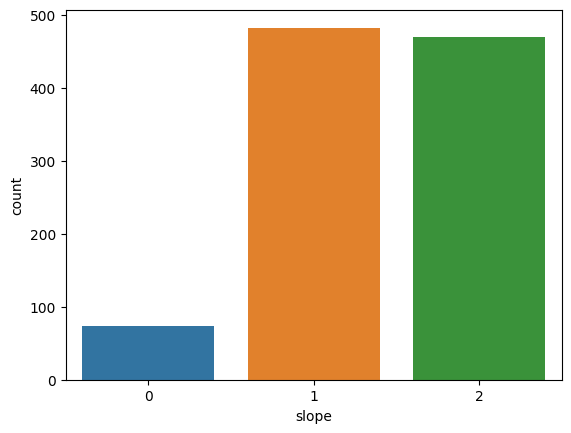

In [43]:
sns.countplot(x="slope", data=df)
plt.show()

Построим график наличия сердечных заболеваний относительно типа пикового сегмента ST:

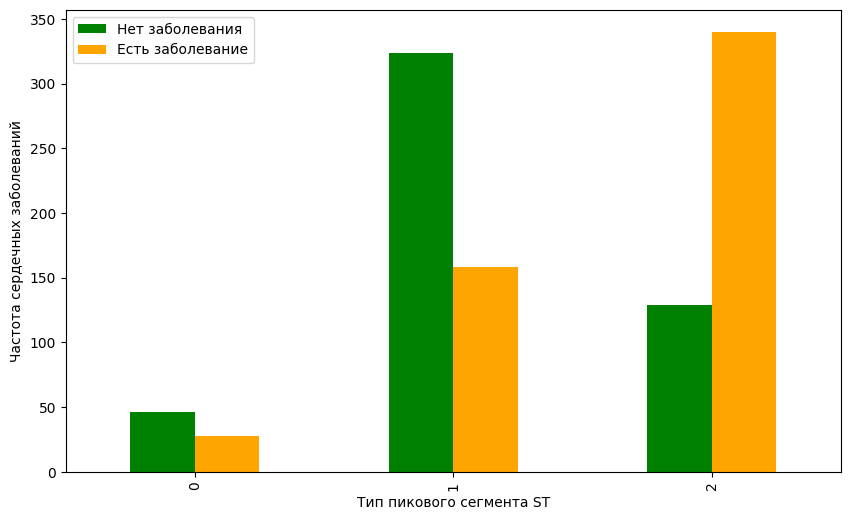

In [44]:
show_target_crosstab('slope', 'Тип пикового сегмента ST', 10)

Видим, что у людей с типом пикового сегмента ST 0 и 1 преобладает число людей без сердечных заболеваний. У людей с типом пикового сегмента ST 2 преобладает число пациентов, обладающих сердечными заболеваниями.

Посмотрим, сколько в среднем людей с различными типами пикового сегмета ST обладает и не обладает сердечными заболеваниями:

In [45]:
df.groupby('slope').mean()['target']

slope
0    0.378378
1    0.327801
2    0.724947
Name: target, dtype: float64

Видим, что 38 процентов людей с типом пикового сегмента 0 обладает сердечными заболеваниями, 33 процента пациентов с типом пикового сегмента 1 обладает сердечными заболеваниями, 72 процента пациентов с типом пикового сегмента 2 обладает сердечными заболеваниями.

### Категориальный признак ca

Выясним, какие значения принимает признак **ca** в датасете:

In [46]:
df.ca.value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

Видим, что в датасете больше всего людей с 0 крупных сосудов, меньше всего --- с 4.

Построим график:

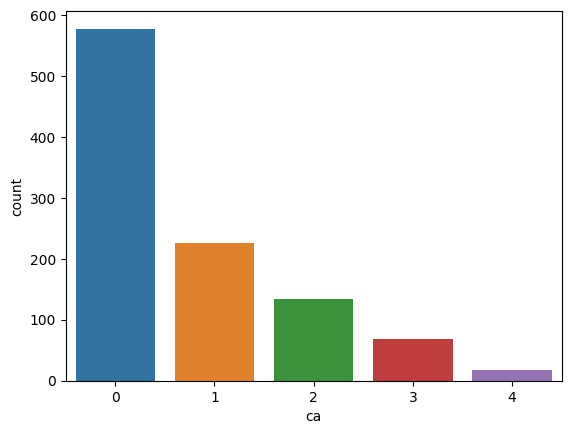

In [47]:
sns.countplot(x="ca", data=df)
plt.show()

Построим график наличия сердечных заболеваний относительно числа крупных сосудов:

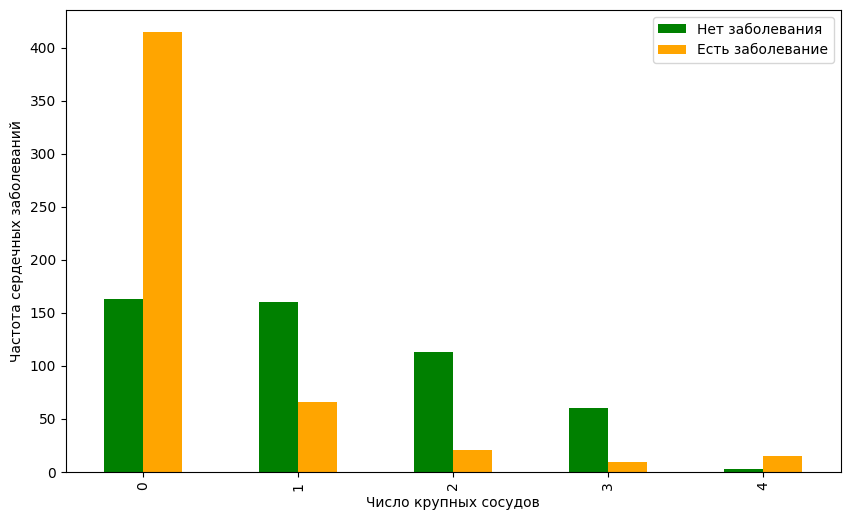

In [48]:
show_target_crosstab('ca', 'Число крупных сосудов', 10)

Видим, что среди людей с числом крупных сосудов 0 и 4 преобладает число пациентов с сердечными заболеваниями. Среди пациентов с 1, 2 и 3 крупными сосудами преобладает число людей без сердечных заболевания. Болше всего в датасете людей с 0 крупных сосудов.

Посмотрим, сколько в среднем людей с различным числом крупных сосудов обладает и не обладает сердечными заболеваниями:

In [49]:
df.groupby('ca').mean()['target']

ca
0    0.717993
1    0.292035
2    0.156716
3    0.130435
4    0.833333
Name: target, dtype: float64

Видим, что среди людей с 0 крупных сосудов 72 процента обладают сердечными заболеваниями. Среди людей с 1 крупным сосудом 29 процентов обладают сердечными заболеваниями. Среди людей с 2 крупными сосудами 16 процентов обладают сердечными заболеваниями. Среди людей с 3 крупными сосудами 13 процентов обладают сердечными заболеваниями. Среди людей с 4 крупными сосудами 83 процента обладают сердечными заболеваниями.

### Категориальный призак thal

Выясним, какие значения принимает признак **thal** в датасете:

In [50]:
df.thal.value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

Видим, что в датасете больше всего людей с типом thal 2, меньше всего --- с типом tal 0.

Построим график:

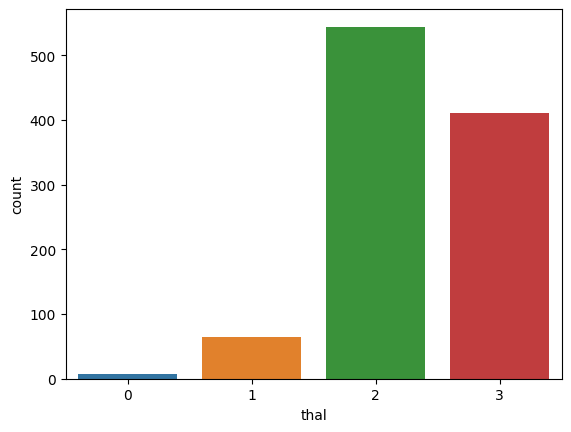

In [51]:
sns.countplot(x="thal", data=df)
plt.show()

Построим график наличия сердечных заболеваний относительно типа thal:

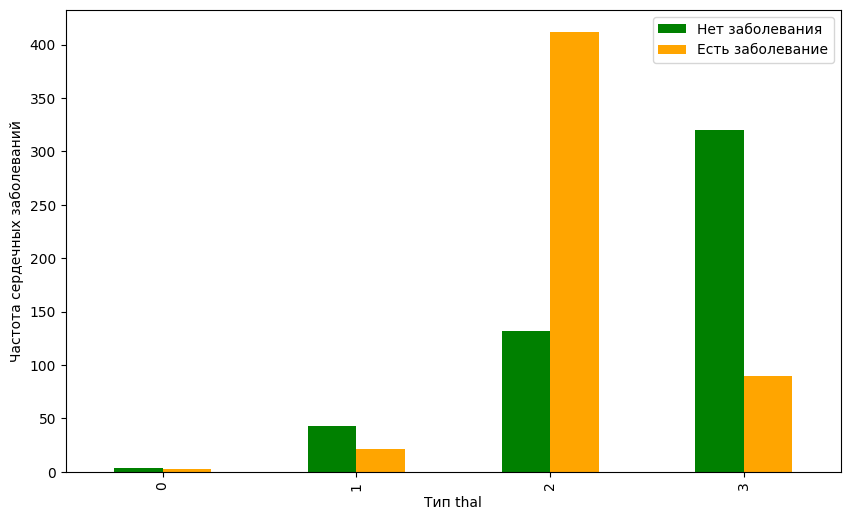

In [52]:
show_target_crosstab('thal', 'Тип thal', 10)

In [53]:
df.groupby('thal').mean()['target']

thal
0    0.428571
1    0.328125
2    0.757353
3    0.219512
Name: target, dtype: float64

Видим, что среди людей с 0 типом thal 43 процента обладают сердечными заболеваниями. Видим, что среди людей с 1 типом thal 33 процента обладают сердечными заболеваниями. Видим, что среди людей с 2 типом thal 76 процентов обладают сердечными заболеваниями. Видим, что среди людей с 3 типом thal 22 процента обладают сердечными заболеваниями.

### Выводы:
* **age** --- пациенты в возрасте от 29 до 54 чаще обладают сердечными заболеваниями. У пациентов в возрасте от 55 до 67 преобладает их отсутствие. У людей в возрасте 41, 51 и 54 года наибольшая частота сердечных заболеваний. Наименьшая --- у людей в возасте 57 и 58 лет. Средний возраст людей без сердечных заболеваний --- 56, с сердечными заболеваниями --- 52; <br>
* **sex** --- 72 процента женщин и 42 процента мужчин в датасете обладают сердечными заболеваниям; <br>
* **cp** --- у пациентов с типом боли 0 примерно в три раза больше людей без сердечных заболеваний. У типов 1, 2 и 3 людей с сердечными заболеваниями больше, чем без них. Наибольшая частота сердечных заболеваний у людей с типом боли 2, наименьшая --- с типом боли 3. 24 процента пациентов с типом боли в груди 0 обладает сердечным заболеванием, у пациентов с типом боли груди 1 этот процент равен 80, у людей с типом боли 2 --- 77 процентов, у людей с типом боли 3 --- 66 процентов; <br>
* **trestbps** --- у пациентов с артериальным давлением ниже 123 мм. рт. ст. преобладает число людей с сердечными заболеваниями. Число людей, не обладающих сердечными заболеваниями, наивысшее у пациентов с артериальным давлением выше 156, а ткже от 123 до 128 мм. рт. ст. Наиболее частый случай пациентов с сердечным заболеванием у людей с артериальным давлением 120 и 130 мм. рт. ст. Среднее артериальное давление у людей без сердечных заболеваний равно 134 мм. рт. ст., у пациентов с сердечными заболеваниями --- 129 мм. рт. ст; <br>
* **chol** --- у людей с холестерином сыворотки ниже 245 мг/дл преобладает число пациентов с сердечными заболеваниями. У пациентов с холестерином сыворотки выше 308 мг/дл преобладает число людей без сердечных заболеваний. Наиболее частое значение холестерина сывортки у людей без сердечных заболеваний равно 212, 254 и 282 мг/дл. Наиболее частое значение холестерина сывортки у людей, обладающих сердечными заболевания равно 204, 234 и 240 мг/дл. Среднее значение холестерина сывортки у людей без сердечных заболеваний равно 251 мг/дл, у пациентов с сердечными заболеваниями --- 241 мг/дл; <br>
* **fbs** --- у людей с уровнем сахара в крови ниже 120 мг/дл преобладает число пациентов с сердечными заболеваниями, а у пациентов с уровнем сахара выше 120 мг/дл --- число людей без сердечных заболеваний. Также видим, что в датасете больше пациентов с уровнем сахара в крови ниже 120 мг/дл.; <br>
* **restecg** --- у людей с типом электрокардии 0 и 2 преобладает число людей без сердечных заболеваний. У пациентов с типом электрокардии 1 преобладает число людей с сердечными заболеваниями; <br>
* **thalach** --- у людей с максимальной частоты сердечных сокращений ниже 150 преобладает число людей без сердечных заболеваний. У пациентов с максимальной частоты сердечных сокращений выше 150 преобладает число людей с сердечными заболеваниями; <br>
* **exang** --- у людей, не обладающих стенокардией, почти в два раза больше людей с сердечными заболеваниями. У пациентов со стенокардией число людей без сердечных заболеваний более чем в три раза больше, чем обладающих ими; <br>
* **oldpeak** --- наибольшее значение людей с сердечными заболеваниями обладает депрессией сегмента ST равной 0.0. У людей с депрессией сегмента ST ниже 0.8 преобладает число пациентов с сердечными заболеваниями. У людей с депрессией сегмента ST выше 0.7 преобладает число пациентов без сердечных заболеваний; <br>
* **slope** --- у людей с типом пикового сегмента ST 0 и 1 преобладает число людей без сердечных заболеваний. У людей с типом пикового сегмента ST 2 преобладает число пациентов, обладающих сердечными заболеваниями; <br>
* **ca** --- среди людей с числом крупных сосудов 0 и 4 преобладает число пациентов с сердечными заболеваниями. Среди пациентов с 1, 2 и 3 крупными сосудами преобладает число людей без сердечных заболевания. Болше всего в датасете людей с 0 крупных сосудов; <br>
* **thal** --- среди людей с 0, 1 и 3 типом thal преобладает число пациентов без сердечных заболеваний. Среди людей с типом thal 2 больше людей с сердечными заболеваниями, чем без них.br>

### Feature Engineering

Преобразуем количественные признаки в категориальные:

### Новый признак категории возраста age

In [54]:
df['age_category'] = pd.qcut(df['age'], 4)
df.groupby(['age_category'])['target'].mean().to_frame().style.background_gradient(cmap='summer_r')

,target
age_category,
"(28.999, 48.0]",0.685921
"(48.0, 56.0]",0.578358
"(56.0, 61.0]",0.305439
"(61.0, 77.0]",0.448133


In [55]:
df['age_category'] = 0
df.loc[df['age'] <= 48, 'age_category'] = 0
df.loc[(df['age'] > 48) & (df['age'] <= 56), 'age_category'] = 1
df.loc[(df['age'] > 56) & (df['age'] <= 61), 'age_category'] = 2
df.loc[df['age'] > 61, 'age_category'] = 3

Введём функцию для удобного отражения результатов:

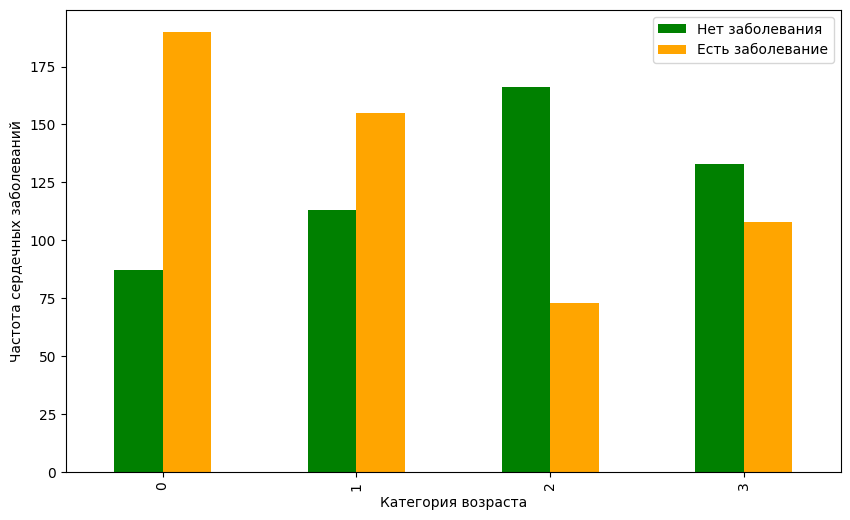

In [56]:
show_target_crosstab('age_category', 'Категория возраста', 10)

### Новый признак категории артериального давления trestbps

In [57]:
df['trestbps_category'] = pd.qcut(df['trestbps'], 3)
df.groupby(['trestbps_category'])['target'].mean().to_frame().style.background_gradient(cmap='summer_r')

,target
trestbps_category,
"(93.999, 122.0]",0.586006
"(122.0, 138.0]",0.525140
"(138.0, 200.0]",0.422840


In [58]:
df['trestbps_category'] = 0
df.loc[df['trestbps'] <= 122, 'trestbps_category'] = 0
df.loc[(df['trestbps'] > 122) & (df['trestbps'] <= 138), 'trestbps_category'] = 1
df.loc[df['trestbps'] > 138, 'trestbps_category'] = 2

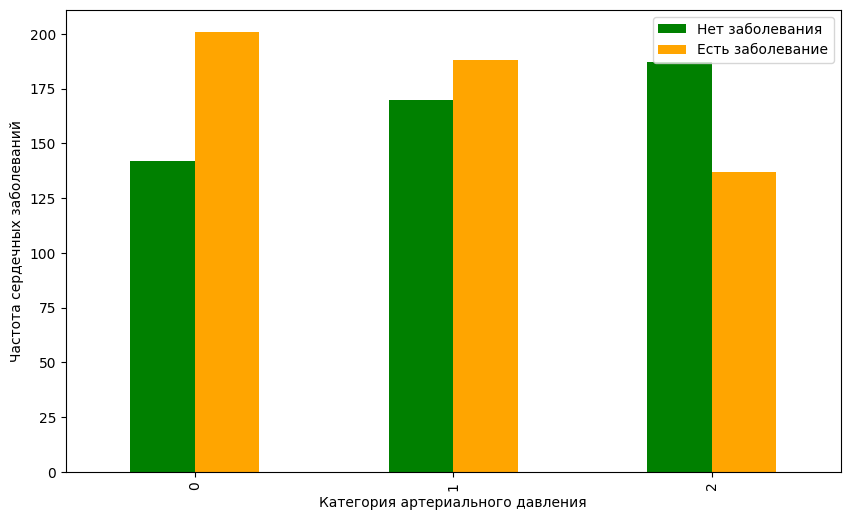

In [59]:
show_target_crosstab('trestbps_category', 'Категория артериального давления', 10)

### Новый признак категории холестирина сыворотки chol

In [60]:
df['chol_category'] = pd.qcut(df['chol'], 4)
df.groupby(['chol_category'])['target'].mean().to_frame().style.background_gradient(cmap='summer_r')

,target
chol_category,
"(125.999, 211.0]",0.603774
"(211.0, 240.0]",0.560311
"(240.0, 275.0]",0.495968
"(275.0, 564.0]",0.388235


In [61]:
df['chol_category'] = 0
df.loc[df['chol'] <= 211, 'chol_category'] = 0
df.loc[(df['chol'] > 211) & (df['chol'] <= 240), 'chol_category'] = 1
df.loc[(df['chol'] > 240) & (df['chol'] <= 275), 'chol_category'] = 2
df.loc[df['chol'] > 275, 'chol_category'] = 3

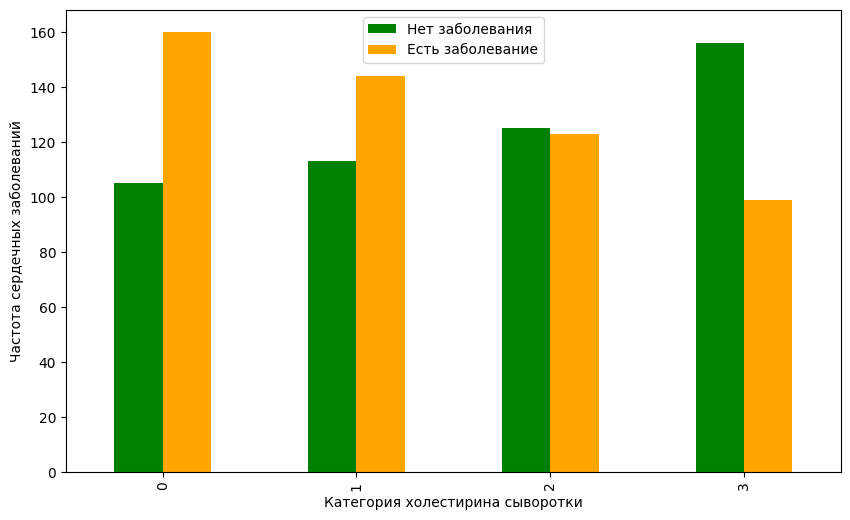

In [62]:
show_target_crosstab('chol_category', 'Категория холестирина сыворотки', 10)

### Новый признак категории максимальной частоты сердечных сокращений thalach

In [63]:
df['thalach_category'] = pd.qcut(df['thalach'], 5)
df.groupby(['thalach_category'])['target'].mean().to_frame().style.background_gradient(cmap='summer_r')

,target
thalach_category,
"(70.999, 129.8]",0.224390
"(129.8, 145.0]",0.318841
"(145.0, 158.0]",0.572816
"(158.0, 170.0]",0.640553
"(170.0, 202.0]",0.826316


In [64]:
df['thalach_category'] = 0
df.loc[df['thalach'] <= 129.8, 'thalach_category'] = 0
df.loc[(df['thalach'] > 129.8) & (df['thalach'] <= 145), 'thalach_category'] = 1
df.loc[(df['thalach'] > 145) & (df['thalach'] <= 158), 'thalach_category'] = 2
df.loc[(df['thalach'] > 158) & (df['thalach'] <= 170), 'thalach_category'] = 3
df.loc[df['thalach'] > 170, 'thalach_category'] = 4

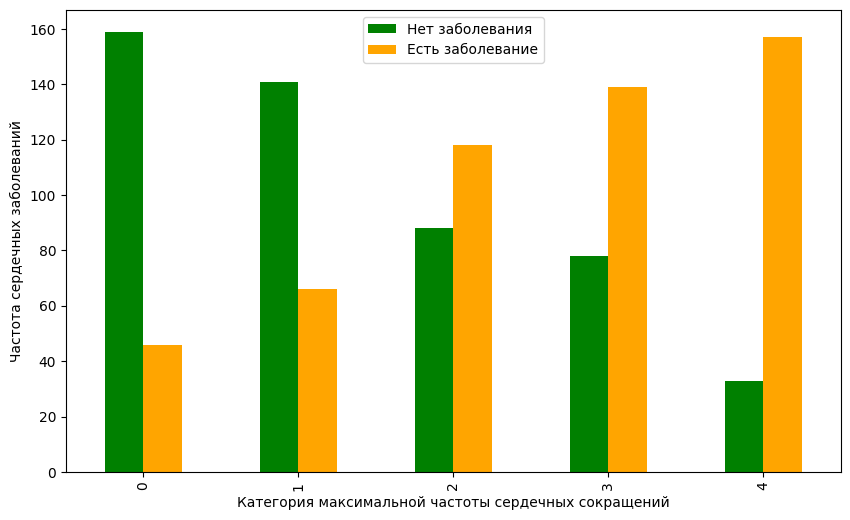

In [65]:
show_target_crosstab('thalach_category', 'Категория максимальной частоты сердечных сокращений', 10)

### Новый признак категории депрессии сегмента ST oldpeak

In [66]:
df['oldpeak_category'] = pd.cut(df['oldpeak'], 3)
df.groupby(['oldpeak_category'])['target'].mean().to_frame().style.background_gradient(cmap='summer_r')

,target
oldpeak_category,
"(-0.0062, 2.067]",0.595041
"(2.067, 4.133]",0.118012
"(4.133, 6.2]",0.176471


In [67]:
df['oldpeak_category'] = 0
df.loc[df['oldpeak'] <= 2.067, 'oldpeak_category'] = 0
df.loc[(df['oldpeak'] > 2.067) & (df['oldpeak'] <= 4.133), 'oldpeak_category'] = 1
df.loc[df['oldpeak'] > 4.133, 'oldpeak_category'] = 2

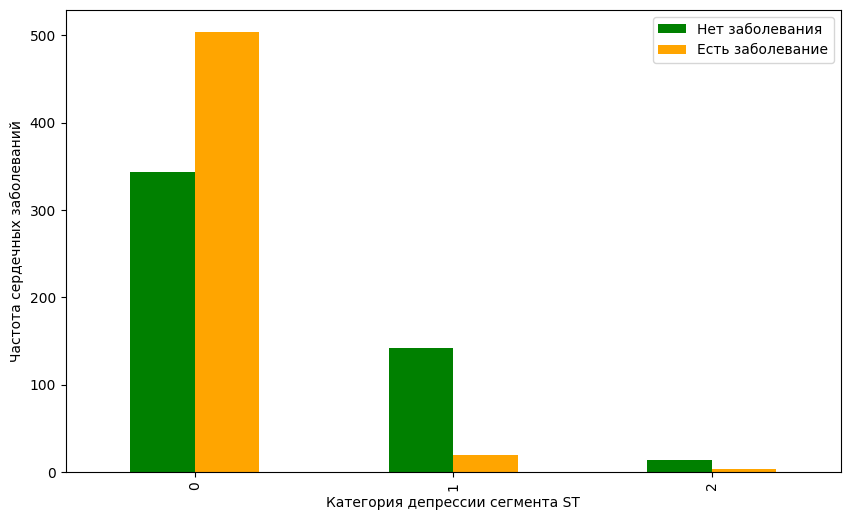

In [68]:
show_target_crosstab('oldpeak_category', 'Категория депрессии сегмента ST', 10)

### Закодируем категориальные признаки

Закодируем катогориальные признаки **cp**, **restecg**, **slope**, **ca**, **thal**, **trestbps_category**, **chol_category**, **thalach_category**, **oldpeak_category**.

Для кодирования признаков воспользуемся OneHotEncoder из библиотеки sklearn. Напишем функцию, которая поможет преобразовывать категориальные признаки:

In [69]:
from sklearn.preprocessing import OneHotEncoder

def encode_categorial(name):
    encoder = OneHotEncoder(handle_unknown='ignore')
    
    # Кодирование признака.
    encoded_df = pd.DataFrame(encoder.fit_transform(df[[name]]).toarray())
    
    # Список названий столбцов.
    column_names = create_column_names(encoded_df, name)
    
    # Переименование столбцов.
    encoded_df.columns = column_names
    
    return encoded_df
    
def create_column_names(encoded_df, prefix):
    column_names = []
    
    for i in range(0, len(encoded_df.columns)):
        column_names.append(prefix + "_" + str(i))
        
    return column_names    

In [70]:
# Список категориальных признаков.
categorial = ['cp', 'restecg', 'slope', 'ca', 'thal', 'age_category', 'trestbps_category', 'chol_category', 'thalach_category', 'oldpeak_category']

# Кодируем катогориальные признаки.
encoded_categorial = [encode_categorial(categorial[i]) for i in range(len(categorial))] 

# Добавляем к исходному датафрейму закодированные значения.
for i in range(len(encoded_categorial)):
    df = df.join(encoded_categorial[i])
    
df    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_category_2,chol_category_3,thalach_category_0,thalach_category_1,thalach_category_2,thalach_category_3,thalach_category_4,oldpeak_category_0,oldpeak_category_1,oldpeak_category_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,53,1,0,140,203,1,0,155,1,3.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,70,1,0,145,174,0,1,125,1,2.6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,61,1,0,148,203,0,1,161,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,62,0,0,138,294,1,1,106,0,1.9,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1021,60,1,0,125,258,0,0,141,1,2.8,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1022,47,1,0,110,275,0,0,118,1,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1023,50,0,0,110,254,0,0,159,0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Удаляем лишние признаки

In [71]:
# Удаляем количественные признаки, которые преобразовали в категориальные.
df.drop(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], axis = 1, inplace = True)

# Удаляем категориальные признаки, которые закодировали.
df.drop(categorial, axis = 1, inplace = True)

df

,sex,fbs,exang,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,...,chol_category_2,chol_category_3,thalach_category_0,thalach_category_1,thalach_category_2,thalach_category_3,thalach_category_4,oldpeak_category_0,oldpeak_category_1,oldpeak_category_2
0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1,0,1,1,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1021,1,0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1022,1,0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1023,0,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Реализация метода классификации

Реализуем метод логистической классификации с возможностью настройки гиперпараметров:

In [72]:
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def calculate_gradient(x, y, hypothesis, answers_size):
    tmp = x.T.dot(hypothesis - y)
    return (1 / answers_size) * tmp

def calculate_error(x, y, hypothesis, answers_size):
    fst_value = y.T.dot(np.log(hypothesis))
    snd_value = (1 - y).T.dot(np.log(1 - hypothesis))
    final_value = fst_value + snd_value
    
    return (-1 / answers_size) * final_value

def logistic_regression_method(x, y, w, alpha, iterations):
    answers_size = y.size
    
    for i in range(0, iterations):
        tmp = x.dot(w)
        
        hypothesis = sigmoid_function(tmp)
        error = calculate_error(x, y, hypothesis, answers_size)
        gradient = calculate_gradient(x, y, hypothesis, answers_size)
        
        w -= alpha * gradient * error
        
    return w

Также реализуем класс логистической регрессии, который будет полезен для оценок:

In [73]:
class LogisticRegressionImpl:
    def __init__(self, alpha = 0.001, iterations = 1000):
        self.alpha = alpha
        self.iterations = iterations
        self.w = None
        
    def fit(self, x, y):
        tmp_w = np.zeros(x.shape[1])
        self.w = logistic_regression_method(x, y, tmp_w, self.alpha, self.iterations)

    def predict(self, x):
        tmp_sigmoid = sigmoid_function(np.dot(x, self.w))
        return np.where(tmp_sigmoid > 0.5, 1, 0)
        
    def get_params(self, deep=True):
        return {'alpha': self.alpha, 'n_iter': self.n_iter}    

### Построение модели

С помощью библиотеки sklearn разделим данные на обучающую и тестовую выборки:

In [74]:
from sklearn.model_selection import train_test_split

x = df.drop(['target'], axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#### Подбор гиперпараметров

Выполним подбор оптимальных гиперпараметров для самостоятельно реализованной версии логистической регрессии. Точность предсказания будем определять с помощью библиотеки sklearn.

In [75]:
from sklearn.metrics import accuracy_score

best_alpha = 0
best_iterations = 0
hyper_best_accuracy = 0
alpha_list = [10 ** (-(i + 1)) for i in range(1, 5)]
iterations_list = [10 ** (i + 1) for i in range (0, 3)]

for alpha in alpha_list:
    for iterations in iterations_list:
        tmp = np.zeros(x_train.shape[1])
        tmp_w = logistic_regression_method(x_train, y_train, tmp, alpha, iterations)
        
        y_pred = sigmoid_function(np.dot(x_test, tmp_w))
        y_pred = np.where(y_pred > 0.5, 1, 0)

        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > hyper_best_accuracy:
            hyper_best_accuracy = accuracy
            best_alpha = alpha
            best_iterations = iterations

print(f'alpha: {best_alpha}, iterations: {best_iterations}, accuracy: {hyper_best_accuracy}')

alpha: 0.01, iterations: 1000, accuracy: 0.8506493506493507


#### Масштабирование данных

При обучение модели используем масштабированием данных. Для этого воспользуемся трансформером StandartScaler из библиотеки sklearn:

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegressionImpl(best_alpha, best_iterations)
model.fit(x_train_scaled, y_train)

y_pred_regression = model.predict(x_test_scaled)

scaled_accuracy = accuracy_score(y_test, y_pred_regression)

print(f'accuracy: {scaled_accuracy}')

accuracy: 0.8214285714285714


#### Кросс-валидация

Пусть число фолдов будет равно 6. Выполним кросс-валидацию для реализации логистической регрессии, воспользовавшись библиотекой sklearn:

In [77]:
from sklearn.model_selection import KFold

accuracies = []
cv = KFold(n_splits = 6, random_state = 19, shuffle = True)

for train_index, test_index in cv.split(x):
    x_train_tmp, x_test_tmp = x.iloc[train_index], x.iloc[test_index]
    y_train_tmp, y_test_tmp = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegressionImpl(best_alpha, best_iterations)
    model.fit(x_train_tmp, y_train_tmp)
    y_pred_tmp = model.predict(x_test_tmp)

    accuracies.append(accuracy_score(y_test_tmp, y_pred_tmp))

cv_accuracy = np.mean(accuracies)
print(f'accuracy: {cv_accuracy}')

accuracy: 0.8604919160646715


#### Результаты обучения модели

In [78]:
res_dict = {'My Logistic Regression':[hyper_best_accuracy, scaled_accuracy, cv_accuracy]}

result = pd.DataFrame(res_dict)
result.index = ['Hyper parameters', 'Scaling', 'Cross validation']

### Повторим прошлые вычисления для всех библиотечных реализаций методов классификации

### Logistic Regression

Воспользуемся LogisticRegression из библиотеки sklearn. 

#### Подбор гиперпараметров (Logistic Regression)

Подберем лучшие значения гиперпараметров с помощью GridSearcherCV:

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

hyper_params_dict = {'C':[10 ** (-4 + i) for i in range (0, 6)], 'penalty':['l1', 'l2']}

model = LogisticRegression()
grid = GridSearchCV(model, hyper_params_dict)
grid.fit(x_train_scaled, y_train)

print('Best parameters:')
print(grid.best_params_)

lib_y_pred = grid.predict(x_test_scaled)
lib_hyper_accuracy = accuracy_score(y_test, lib_y_pred)

print(f'accuracy: {lib_hyper_accuracy}')

Best parameters:
{'C': 1, 'penalty': 'l2'}
accuracy: 0.8311688311688312


#### Масштабирование данных (Logistic Regression)

In [80]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

y_pred_lib_regression = model.predict(x_test_scaled)
lib_scaled_accuracy = accuracy_score(y_test, y_pred_lib_regression)

print(f'accuracy: {lib_scaled_accuracy}')

accuracy: 0.8311688311688312


#### Кросс-валидация (Logistic Regression)

In [81]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(C = 1, penalty='l2')
accuracies = cross_val_score(model, x_train_scaled, y_train, cv=6)

lib_cross_accuracy = np.mean(accuracies)

print(f'accuracy: {lib_cross_accuracy}')

accuracy: 0.8744164332399627


In [82]:
result.insert(result.shape[1], 'Lib Logistic Regression',
              [lib_hyper_accuracy, lib_scaled_accuracy, lib_cross_accuracy], True)

### SVM

Воспользуемся SVC из библиотеки sklearn.

#### Подбор гиперпараметров (SVM)

In [83]:
from sklearn.svm import SVC

hyper_params_dict = {'C':[10 ** (-4 + i) for i in range (0, 6)], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

model = SVC()
grid = GridSearchCV(model, hyper_params_dict)
grid.fit(x_train_scaled, y_train)

print ('Best params:')
print(grid.best_params_)

y_pred = grid.predict(x_test_scaled)
svm_hyper_accuracy = accuracy_score(y_test, y_pred)

print(f'accuracy: {svm_hyper_accuracy}')

Best params:
{'C': 10, 'kernel': 'poly'}
accuracy: 0.9805194805194806


#### Масштабирование данных (SVM)

In [84]:
model = SVC()
model.fit(x_train_scaled, y_train)

y_pred_svm = model.predict(x_test_scaled)
svm_scaled_accuracy = accuracy_score(y_test, y_pred_svm) 

print(f'accuracy: {svm_scaled_accuracy}')

accuracy: 0.9545454545454546


#### Кросс-валидация (SVM)

In [85]:
model = SVC(C = 10, kernel = 'poly')
accuracies = cross_val_score(model, x_train_scaled, y_train, cv=6)

svm_cross_accuracy = np.mean(accuracies)

print(f'accuracy: {svm_cross_accuracy}')

accuracy: 0.983251633986928


In [86]:
result.insert(result.shape[1], 'SVM',
              [svm_hyper_accuracy, svm_scaled_accuracy, svm_cross_accuracy], True)

### KNN

Воспользуемся KNeighborsClassifier из библиотеки sklearn.

#### Подбор гиперпараметров (KNN)

In [87]:
from sklearn.neighbors import KNeighborsClassifier

hyper_params_dict = {'n_neighbors':[i for i in range (1, 8)], 'weights':['uniform', 'distance']}

model = KNeighborsClassifier()
grid = GridSearchCV(model, hyper_params_dict)
grid.fit(x_train_scaled, y_train)

print ('Best params:')
print(grid.best_params_)

y_pred = grid.predict(x_test_scaled)
knn_hyper_accuracy = accuracy_score(y_test, y_pred)

print(f'accuracy: {knn_hyper_accuracy}')

Best params:
{'n_neighbors': 5, 'weights': 'distance'}
accuracy: 0.9805194805194806


#### Масштабирование данных (KNN)

In [88]:
model = KNeighborsClassifier()
model.fit(x_train_scaled, y_train)

y_pred_knn = model.predict(x_test_scaled)
knn_scaled_accuracy = accuracy_score(y_test, y_pred_knn)

print(f'accuracy: {knn_scaled_accuracy}')

accuracy: 0.7922077922077922


#### Кросс-валидация (KNN)

In [89]:
model = KNeighborsClassifier(n_neighbors = 12, weights = 'distance')
accuracies = cross_val_score(model, x_train_scaled, y_train, cv=6)

knn_cross_accuracy = np.mean(accuracies)

print(f'accuracy: {knn_cross_accuracy}')

accuracy: 0.9818627450980393


In [90]:
result.insert(result.shape[1], 'KNN',
              [knn_hyper_accuracy, knn_scaled_accuracy, knn_cross_accuracy], True)

### Naive Bayes

Воспользуемся GaussianNB из библиотеки sklearn.

#### Подбор гиперпараметров (Naive Bayes)

In [91]:
from sklearn.naive_bayes import GaussianNB

hyper_params_dict = {'var_smoothing':[10 ** (-i) for i in range (-4, 13)]}

model = GaussianNB()
grid = GridSearchCV(model, hyper_params_dict)
grid.fit(x_train_scaled, y_train)

print ('Best params:')
print(grid.best_params_)

y_pred = grid.predict(x_test_scaled)
nb_hyper_accuracy = accuracy_score(y_test, y_pred)

print(f'accuracy: {nb_hyper_accuracy}')

Best params:
{'var_smoothing': 1}
accuracy: 0.7824675324675324


#### Масштабирование данных (Naive Bayes)

In [92]:
model = GaussianNB()
model.fit(x_train_scaled, y_train)

y_pred_nb = model.predict(x_test_scaled)
nb_scaled_accuracy = accuracy_score(y_test, y_pred_nb)

print(f'accuracy: {nb_scaled_accuracy}')

accuracy: 0.7045454545454546


#### Кросс-валидация (Naive Bayes)

In [93]:
model = GaussianNB(var_smoothing = 1)
accuracies = cross_val_score(model, x_train_scaled, y_train, cv=6)

nb_cross_accuracy = np.mean(accuracies)

print(f'accuracy: {nb_cross_accuracy}')

accuracy: 0.815873015873016


In [94]:
result.insert(result.shape[1], 'Naive Bayes',
              [nb_hyper_accuracy, nb_scaled_accuracy, nb_cross_accuracy], True)

### Decision Tree

Воспользуемся DecisionTreeClassifier из библиотеки sklearn.

#### Подбор гиперпараметров (Decision Tree)

In [95]:
from sklearn.tree import DecisionTreeClassifier

hyper_params_dict = {'max_depth':[i for i in range (1, 13)], 'criterion':['gini', 'entropy']}

model = DecisionTreeClassifier()
grid = GridSearchCV(model, hyper_params_dict)
grid.fit(x_train_scaled, y_train)

print ('Best params:')
print(grid.best_params_)

y_pred = grid.predict(x_test_scaled)
dt_hyper_accuracy = accuracy_score(y_test, y_pred)

print(f'accuracy: {dt_hyper_accuracy}')

Best params:
{'criterion': 'entropy', 'max_depth': 12}
accuracy: 0.9577922077922078


#### Масштабирование данных (Decision Tree)

In [96]:
model = DecisionTreeClassifier()
model.fit(x_train_scaled, y_train)

y_pred_dt = model.predict(x_test_scaled)
dt_scaled_accuracy = accuracy_score(y_test, y_pred_dt)

print(f'accuracy: {dt_scaled_accuracy}')

accuracy: 0.9805194805194806


#### Кросс-валидация (Decision Tree)

In [97]:
model = DecisionTreeClassifier(max_depth = 12, criterion = 'gini')
accuracies = cross_val_score(model, x_train_scaled, y_train, cv=6)

dt_cross_accuracy = np.mean(accuracies)

print(f'accuracy: {dt_cross_accuracy}')

accuracy: 0.9678688141923436


In [98]:
result.insert(result.shape[1], 'Decision Tree',
              [dt_hyper_accuracy, dt_scaled_accuracy, dt_cross_accuracy], True)

### Результаты

Рассмотрим итоговую таблицу

In [99]:
result.style.format("{:.8f}")

,My Logistic Regression,Lib Logistic Regression,SVM,KNN,Naive Bayes,Decision Tree
Hyper parameters,0.85064935,0.83116883,0.98051948,0.98051948,0.78246753,0.95779221
Scaling,0.82142857,0.83116883,0.95454545,0.79220779,0.70454545,0.98051948
Cross validation,0.86049192,0.87441643,0.98325163,0.98186275,0.81587302,0.96786881


**Выводы**:
- Самая высокая точность получилась у метода SVM с кросс-валидацией;
- Самая низкая точность получилась у метода Naive Bayes с масштабированием;
- Самостоятельная реализация логистической регрессии по точности близка к библиотечной реализации;
- Самостоятельная реализация логистической регрессии получилась точнее библиотечной реализации метода Naive Bayes.

Построим conusion matrices:

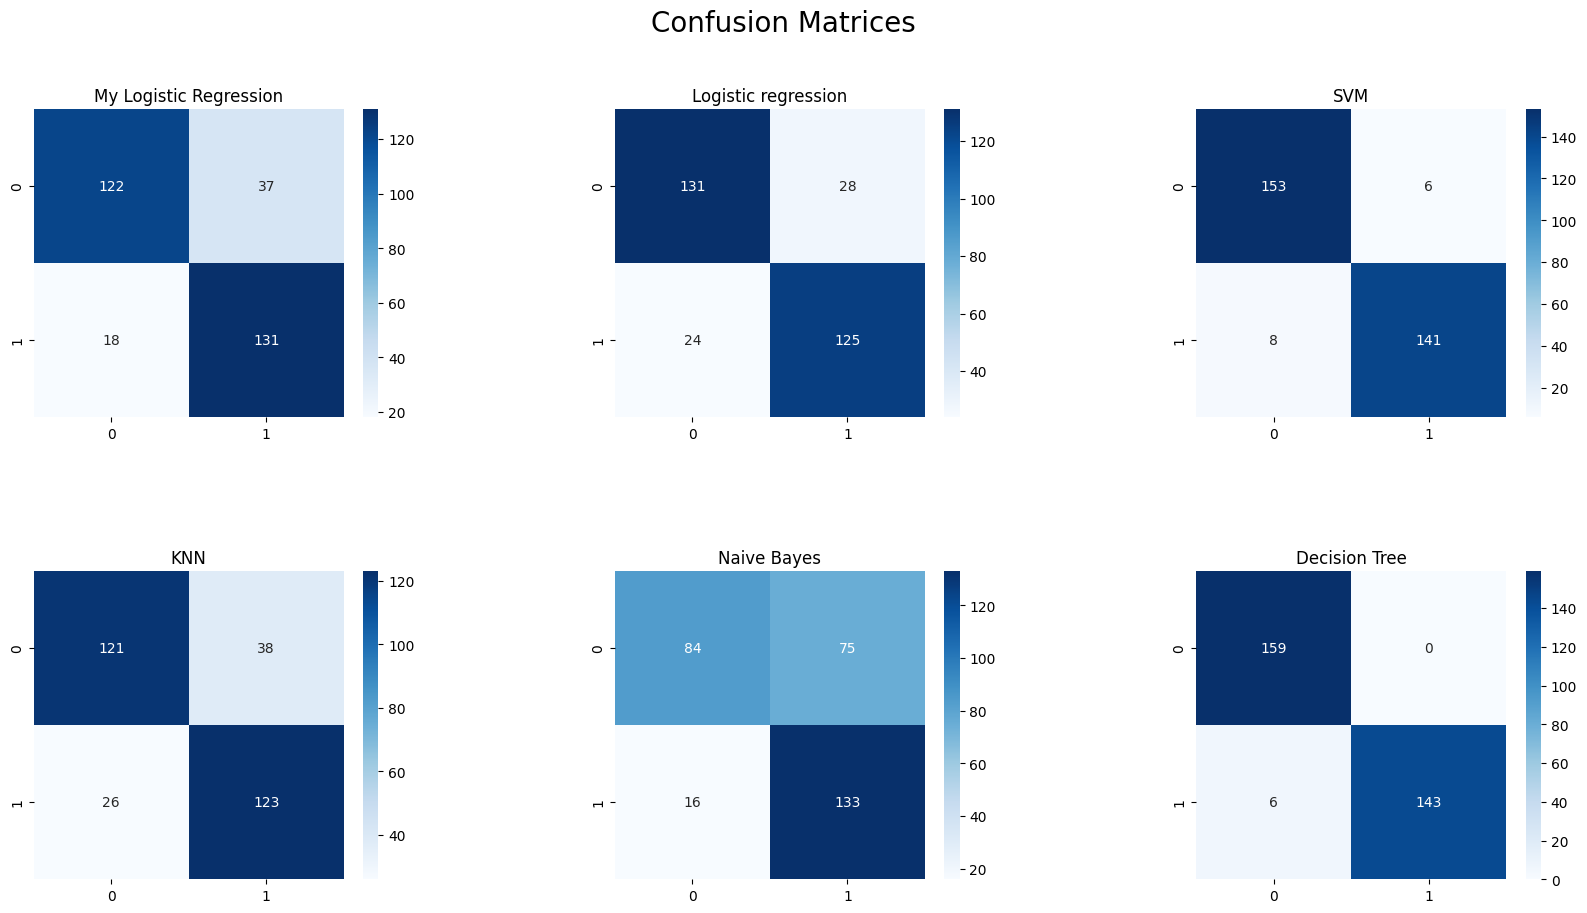

In [100]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(20, 10))

plt.suptitle('Confusion Matrices', fontsize = 20)
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

plt.subplot(2, 3, 1)
plt.title("My Logistic Regression")
sns.heatmap(confusion_matrix(y_test, y_pred_regression), cmap='Blues', annot=True, fmt='d')

plt.subplot(2, 3, 2)
plt.title("Logistic regression")
sns.heatmap(confusion_matrix(y_test, y_pred_lib_regression), cmap='Blues', annot=True, fmt='d')

plt.subplot(2, 3, 3)
plt.title("SVM")
sns.heatmap(confusion_matrix(y_test, y_pred_svm), cmap="Blues", annot=True, fmt="d")

plt.subplot(2, 3, 4)
plt.title("KNN")
sns.heatmap(confusion_matrix(y_test, y_pred_knn), cmap='Blues', annot=True, fmt='d')

plt.subplot(2, 3, 5)
plt.title("Naive Bayes")
sns.heatmap(confusion_matrix(y_test, y_pred_nb), cmap='Blues', annot=True, fmt='d')

plt.subplot(2, 3, 6)
plt.title("Decision Tree")
sns.heatmap(confusion_matrix(y_test, y_pred_dt), cmap='Blues', annot=True, fmt='d')

plt.show()

**Выводы**:
- Лучшая точность у библиотечных реализаций методов SVM и Decision Tree;
- Худшая точность у библиотечной реализации метода Naive Bayes;
- Самостоятельная реализация логистической регрессии близка по точности к библиотечной реализации.

### (+2 балла) Реализовать еще один метод классификации

Самостоятельно реализуем метод классификации SVM:

In [101]:
def calculate_shift_condition(tmp_y, tmp_x, x_index, w, b):
    tmp_convererted_x = np.asarray(tmp_x, dtype='float64')
    tmp_shift_val = (np.dot(tmp_convererted_x, w) - b)
    return tmp_y[x_index] * tmp_shift_val >= 1

def svm_iteration(i, x, tmp_y, alpha, w, b):
    for x_index, tmp_x in enumerate(x):
        shift_condition = calculate_shift_condition(tmp_y, tmp_x, x_index, w, b)
            
        tmp_shift = (2 / i * w)
        if shift_condition:
            w -= (alpha * tmp_shift)
        else:
            snd_shift = np.dot(tmp_x, tmp_y[x_index])
            w -= alpha * (tmp_shift - snd_shift)
            b -= alpha * tmp_y[x_index]
            
    return (w, b)

def svm_method(x, y, alpha, iterations):
    b = 0
    samples_number, features_number = x.shape
    w = np.zeros(features_number)
    tmp_y = np.where(y <= 0, -1, 1)
    
    for i in range(0, iterations):
        (w, b) = svm_iteration(i + 1, x, tmp_y, alpha, w, b)

    return (w, b)                    

Также реализуем класс SVM, который будет полезен для оценок:

In [102]:
class SVMImpl:
    def __init__(self, alpha = 0.01, iterations = 1000):
        self.iterations = iterations
        self.alpha = alpha
        self.w = None
        self.b = None

    def fit(self, x, y):
        self.w, self.b = svm_method(x, y, self.alpha, self.iterations)

    def predict(self, x):
        tmp_out = np.dot(x, self.w) - self.b
        return np.where(np.sign(tmp_out) <= -1, 0, 1)

#### Подбор гиперпараметров (самостоятельная реализация SVM):

Выполним подбор оптимальных гиперпараметров для самостоятельно реализованной версии логистической регрессии. Точность предсказания будем определять с помощью библиотеки sklearn.

In [103]:
best_alpha = 0
best_iterations = 0
svm_impl_hyper_accuracy = 0
alpha_list = [10 ** (-(i + 1)) for i in range(1, 5)]
iterations_list = [10 ** (i + 1) for i in range (0, 3)]

for alpha in alpha_list:
    for iterations in iterations_list:
        tmp_w, tmp_b = svm_method(x_train_scaled, y_train, alpha, iterations)
        
        y_pred = np.dot(x_test, tmp_w) - tmp_b
        y_pred = np.where(np.sign(y_pred) <= -1, 0, 1)

        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > svm_impl_hyper_accuracy:
            svm_impl_hyper_accuracy = accuracy
            best_alpha = alpha
            best_iterations = iterations

print(f'alpha: {best_alpha}, iterations: {best_iterations}, accuracy: {svm_impl_hyper_accuracy}')

alpha: 1e-05, iterations: 10, accuracy: 0.8409090909090909


#### Масштабирование данных (самостоятельная реализация SVM):

In [104]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = SVMImpl(best_alpha, best_iterations)
model.fit(x_train_scaled, y_train)

y_pred_svm_impl = model.predict(x_test_scaled)

svm_impl_scaled_accuracy = accuracy_score(y_test, y_pred_svm_impl)

print(f'accuracy: {svm_impl_scaled_accuracy}')

accuracy: 0.8376623376623377


#### Кросс-валидация (самостоятельная реализация SVM):

In [105]:
accuracies = []
cv = KFold(n_splits = 6, random_state = 19, shuffle = True)

for train_index, test_index in cv.split(x):
    x_train_tmp, x_test_tmp = x.iloc[train_index], x.iloc[test_index]
    y_train_tmp, y_test_tmp = y.iloc[train_index], y.iloc[test_index]
    
    model = SVMImpl(best_alpha, best_iterations)
    model.fit(x_train_tmp.to_numpy(), y_train_tmp)
    y_pred_tmp = model.predict(x_test_tmp)

    accuracies.append(accuracy_score(y_test_tmp, y_pred_tmp))

svm_imp_cv_accuracy = np.mean(accuracies)

print(f'accuracy: {svm_imp_cv_accuracy}')

accuracy: 0.8439284485724116


In [106]:
result.insert(result.shape[1], 'My SVM',
              [svm_impl_hyper_accuracy, svm_impl_scaled_accuracy, svm_imp_cv_accuracy], True)

### Результаты

Итоговая таблица:

In [107]:
result.style.format("{:.8f}")

,My Logistic Regression,Lib Logistic Regression,SVM,KNN,Naive Bayes,Decision Tree,My SVM
Hyper parameters,0.85064935,0.83116883,0.98051948,0.98051948,0.78246753,0.95779221,0.84090909
Scaling,0.82142857,0.83116883,0.95454545,0.79220779,0.70454545,0.98051948,0.83766234
Cross validation,0.86049192,0.87441643,0.98325163,0.98186275,0.81587302,0.96786881,0.84392845


**Выводы**:
- Самостоятельная реализация SVM ниже библиотечной реализации по точности;
- Самостоятельная реализация SVM получилась точнее библиотечной реализации метода Naive Bayes;
- Самостоятельная реализация SVM получилась точнее самостоятельной реализации метода Logistic regression;

Построим conusion matrices:

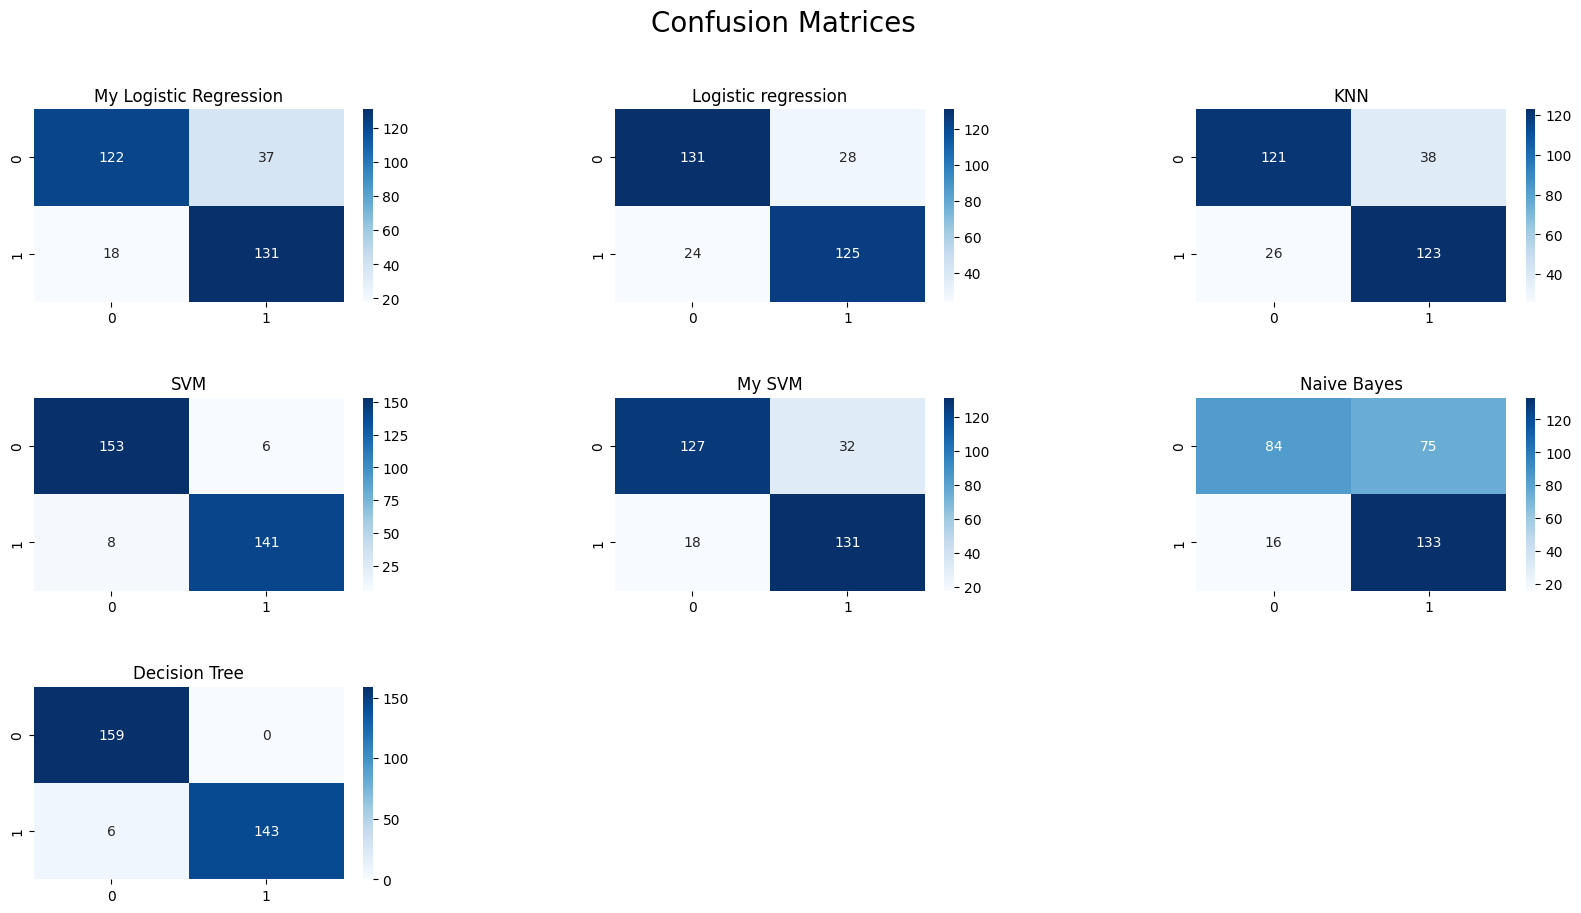

In [108]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(20, 10))

plt.suptitle('Confusion Matrices', fontsize = 20)
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

plt.subplot(3, 3, 1)
plt.title("My Logistic Regression")
sns.heatmap(confusion_matrix(y_test, y_pred_regression), cmap='Blues', annot=True, fmt='d')

plt.subplot(3, 3, 2)
plt.title("Logistic regression")
sns.heatmap(confusion_matrix(y_test, y_pred_lib_regression), cmap='Blues', annot=True, fmt='d')

plt.subplot(3, 3, 3)
plt.title("KNN")
sns.heatmap(confusion_matrix(y_test, y_pred_knn), cmap='Blues', annot=True, fmt='d')

plt.subplot(3, 3, 4)
plt.title("SVM")
sns.heatmap(confusion_matrix(y_test, y_pred_svm), cmap='Blues', annot=True, fmt='d')

plt.subplot(3, 3, 5)
plt.title("My SVM")
sns.heatmap(confusion_matrix(y_test, y_pred_svm_impl), cmap="Blues", annot=True, fmt="d")

plt.subplot(3, 3, 6)
plt.title("Naive Bayes")
sns.heatmap(confusion_matrix(y_test, y_pred_nb), cmap='Blues', annot=True, fmt='d')

plt.subplot(3, 3, 7)
plt.title("Decision Tree")
sns.heatmap(confusion_matrix(y_test, y_pred_dt), cmap='Blues', annot=True, fmt='d')

plt.show()

**Выводы**:
- Самостоятельная реализация SVM выше по точности самостоятельной реализации логистической регрессии;
- Самостоятельная реализация SVM выше по точности библиотечной реализации Naive Bayes, KNN;
- Самостоятельная реализация SVM ниже по точности библиотечной реализации SVM.